In [9]:
import pandas as pd

# header = 0 -> csv의 컬럼 -> df의 컬럼의로 사용
month = pd.read_csv("./2021연령.csv", header=0, engine="python", encoding='cp949')
print(f"month 크기 {month.shape}")
month.head()


month 크기 (10, 14)


,가해운전자 연령층,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,합계,"203,130","14,909","14,511","16,600","17,403","17,378","17,575","17,994","16,418","17,012","18,300","18,096","16,934"
1,20세이하,"6,960",363,422,570,683,669,666,687,648,632,619,534,467
2,21~30세,"29,076","2,185","2,094","2,355","2,497","2,506","2,542","2,597","2,451","2,361","2,549","2,445","2,494"
3,31~40세,"30,304","2,461","2,218","2,466","2,555","2,626","2,649","2,651","2,388","2,402","2,664","2,667","2,557"
4,41~50세,"36,480","2,780","2,630","2,883","3,214","3,159","3,103","3,236","2,888","2,978","3,305","3,199","3,105"


In [10]:
# 결측치 제거
month = month.dropna()
# 월별 합계가 있는 첫번째 행 제거
month = month.drop([0])
# 컬럼명을 바꿔주기 위해 기존 컬럼명을 리스트로 생성
col = month.columns.to_list()
# 리스트에서 "월"을 split으로 날리고 할당해준다.
# 리스트의 0번째 값은 '가해운전자 연령층'이므로 제외한다.
col = [i.split("월")[0] for i in col[1:]]
# 처리된 리스트에 '가해운전자 연령층'이 없으므로 '연령'으로 넣어줬다.
new_col = ["연령"] + col
# 완성된 리스트를 컬럼명으로 적용
month.columns = new_col

In [11]:
month.head(2)

,연령,합계,01,02,03,04,05,06,07,08,09,10,11,12
1,20세이하,"6,960",363,422,570,683,669,666,687,648,632,619,534,467
2,21~30세,"29,076","2,185","2,094","2,355","2,497","2,506","2,542","2,597","2,451","2,361","2,549","2,445","2,494"


In [5]:
month.tail(3)

,연령,합계,01,02,03,04,05,06,07,08,09,10,11,12
6,61~64세,"18,578","1,291","1,320","1,525","1,501","1,616","1,590","1,671","1,481","1,600","1,668","1,730","1,585"
7,65세이상,"31,841","2,048","2,180","2,611","2,622","2,669","2,754","2,806","2,586","2,862","3,117","2,999","2,587"
8,미분류,"2,953",244,236,211,235,234,250,214,232,238,279,270,310


In [13]:
# index가 8인 행 삭제
# month = month.drop(index=8)

# "연령"과 "합계"를 기준으로 melt
mon_melt = pd.melt(month, id_vars=["연령","합계"])

# 컬럼명 지정
mon_melt.columns = ["연령", "합계", "월", "발생건수"]

# 타입 변환
mon_melt = mon_melt.astype({'월':'int'})

# '합계' 컬럼의 쉼표(,) 제거 후 정수로 변환
mon_melt['합계'] = mon_melt['합계'].str.replace(',', '').astype(int)

# '발생건수' 컬럼의 쉼표(,) 제거 후 정수로 변환
mon_melt['발생건수'] = mon_melt['발생건수'].str.replace(',', '').astype(int)

# 전처리와 시각화를 따로 진행할 예정이라 저장해주기
mon_melt.to_csv("2021연령_월별.csv", index=False, encoding='utf-8')
  

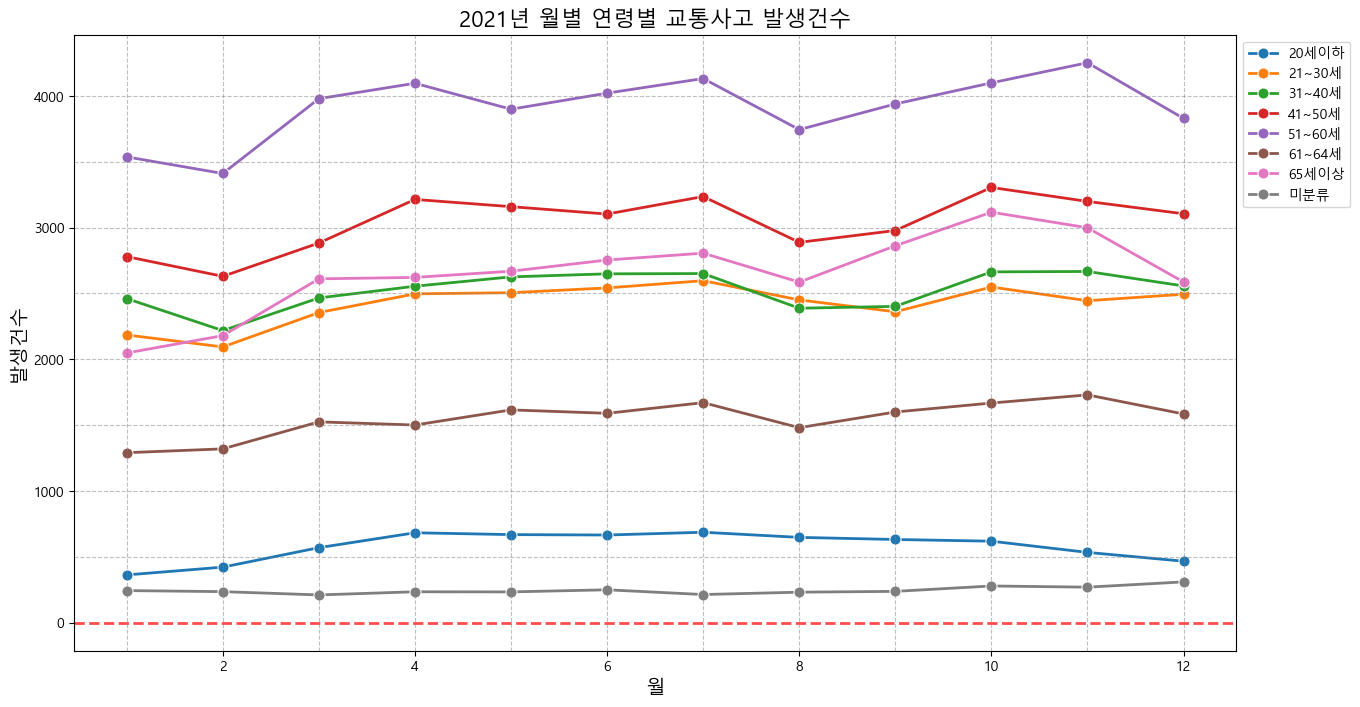

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = './2021연령_월별.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

# 시각화
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x="월", y="발생건수", hue="연령", data=df, marker='o', markersize=8, linewidth=2)

# 수평 보조선 추가 (점선, 두껍게 설정)
ax.axhline(y=0, linestyle='--', linewidth=2, color='red', alpha=0.7)

# 500단위 수평 보조선 추가
max_value = df['발생건수'].max()
step = 500
for line_value in range(500, max_value, 500):
    ax.axhline(y=line_value, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)

# 수직 보조선 추가 (점선)
for month in df['월'].unique():
    ax.axvline(x=month, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)

# 그래프 제목과 레이블 추가
plt.title('2021년 월별 연령별 교통사고 발생건수', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('발생건수', fontsize=14)

# 범례 위치 조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 표시
plt.show()


C:\Users\kkt82\AppData\Local\Temp\ipykernel_12896\1217908330.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melted_df, x="월", y="증감률", ax=axes[i], palette="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\kkt82\AppData\Local\Temp\ipykernel_12896\1217908330.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melted_df, x="월", y="증감률", ax=axes[i], palette="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\kkt82\AppData\Local\T

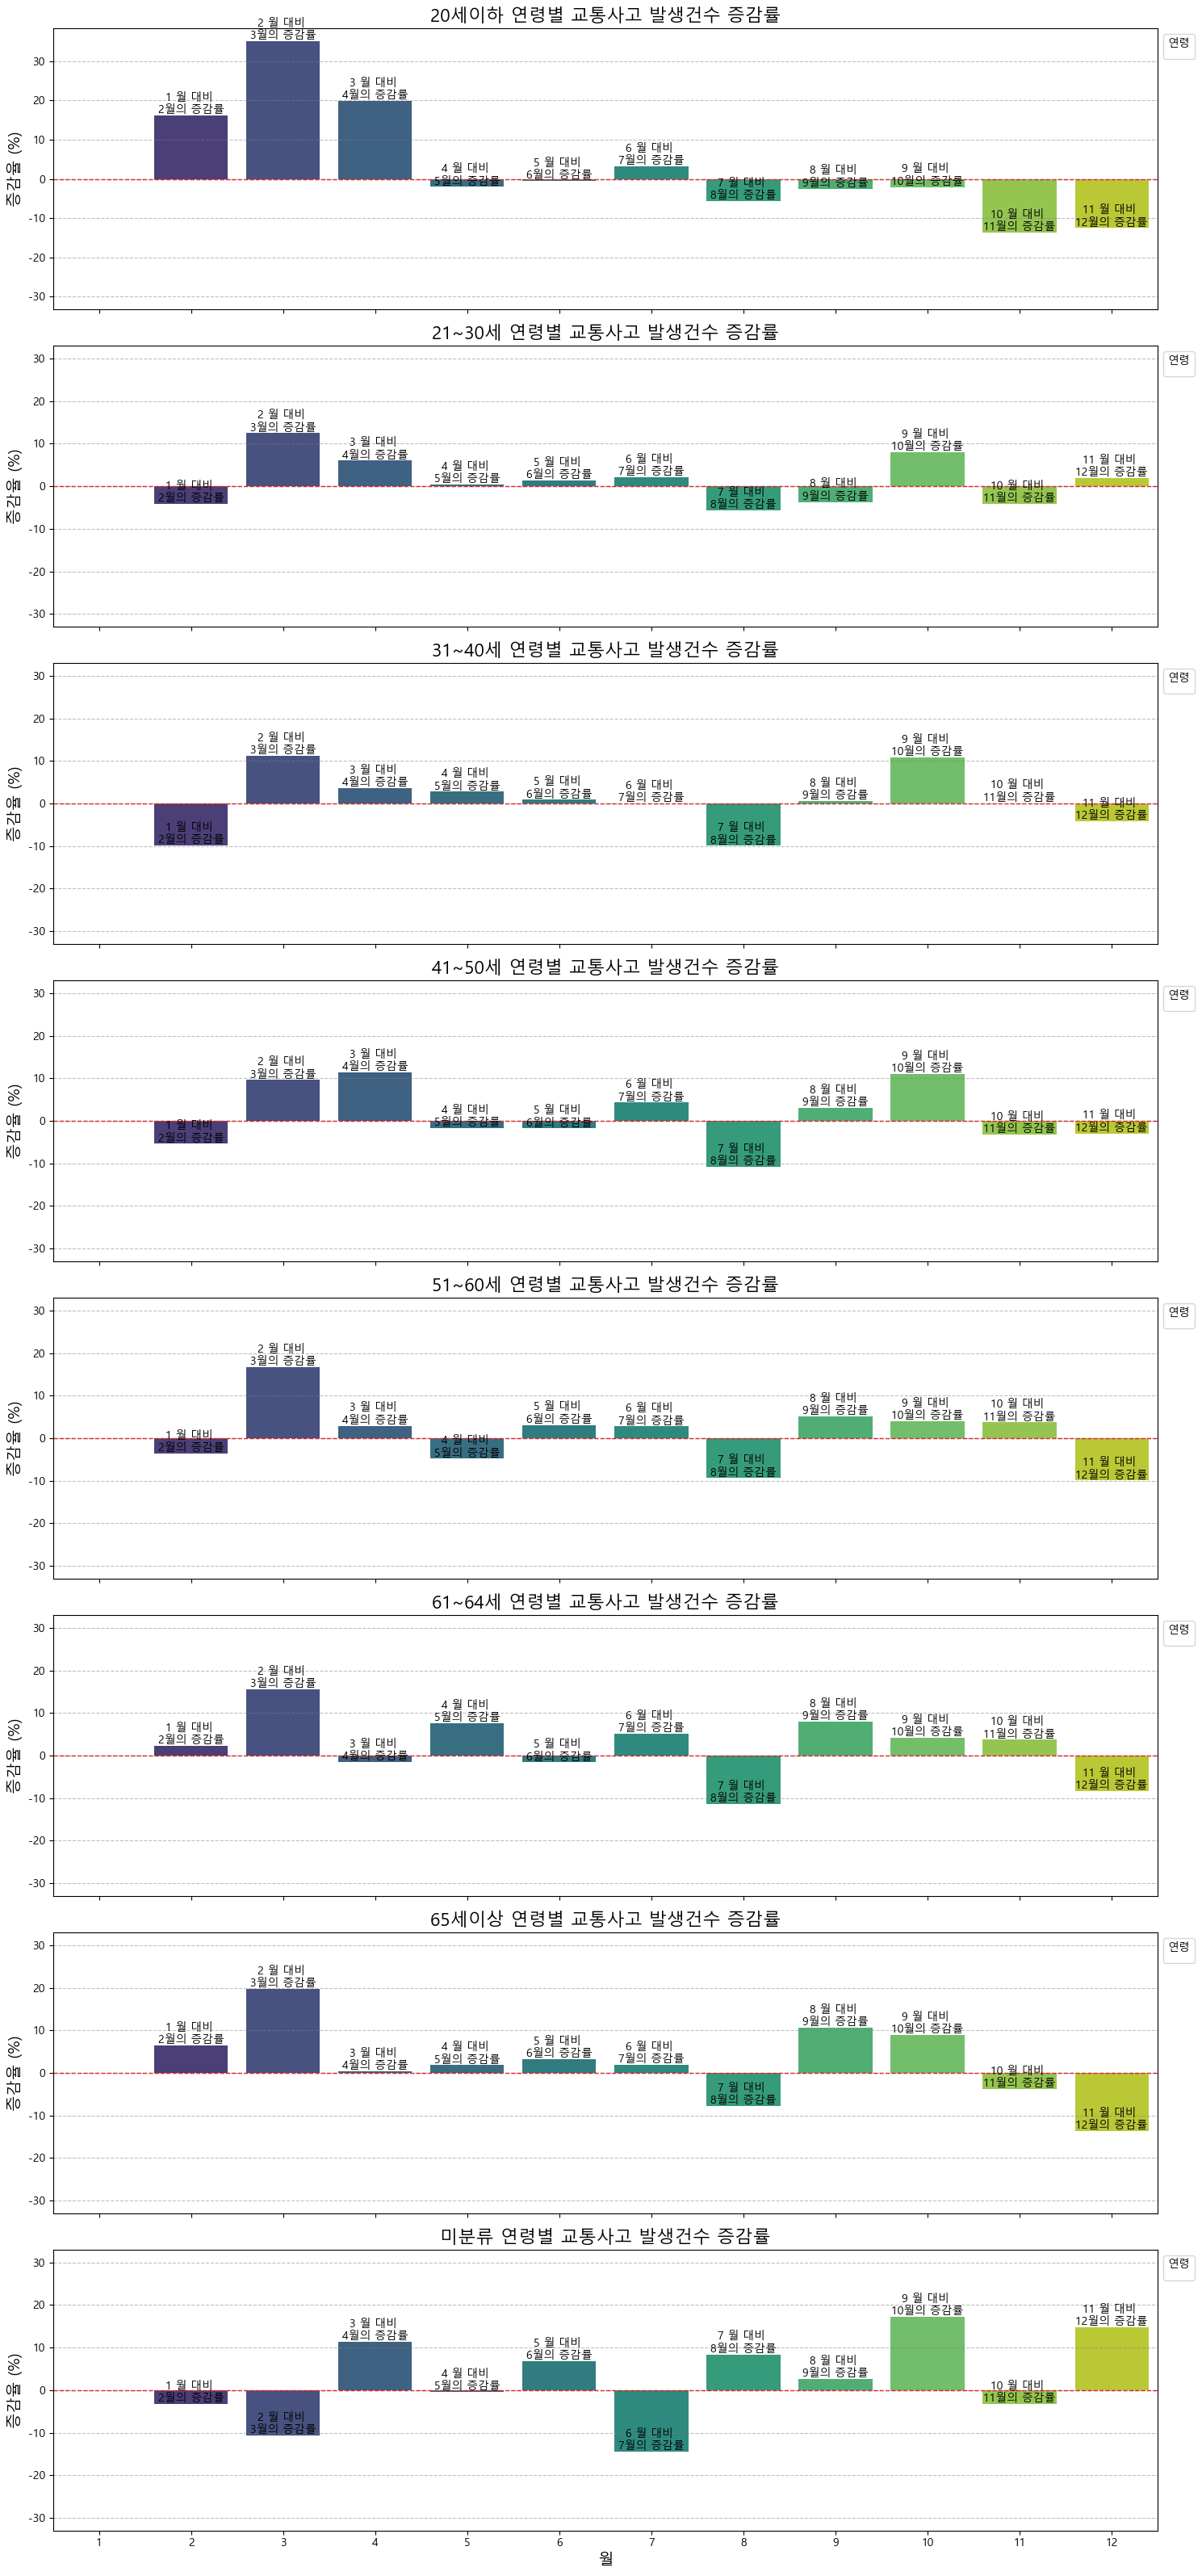

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 음수 기호 지원 폰트 설정
rc('axes', unicode_minus=False)

# CSV 파일 읽기
data_df = pd.read_csv("2021연령_월별.csv", encoding='utf-8')

# 월별 교통사고 발생건수 계산
monthly_accidents = data_df.groupby(['월', '연령']).sum().reset_index()

# 월별 교통사고 발생건수를 피벗 테이블로 변환
pivot_table = monthly_accidents.pivot_table(values='발생건수', index='연령', columns='월')

# 증감률 계산
percentage_change = pivot_table.pct_change(axis=1) * 100

# 시각화 (막대 그래프)
fig, axes = plt.subplots(nrows=len(pivot_table.index), ncols=1, figsize=(15, 4 * len(pivot_table.index)), sharex=True)

for i, age_group in enumerate(pivot_table.index):
    # 증감률 데이터프레임을 melt
    melted_df = percentage_change.reset_index().melt(id_vars="연령", var_name="월", value_name="증감률")
    melted_df = melted_df[melted_df['연령'] == age_group]
    
    sns.barplot(data=melted_df, x="월", y="증감률", ax=axes[i], palette="viridis")

    # 각 막대마다 몇 월인지 라벨 추가
    for bar, month_label in zip(axes[i].patches, melted_df['월']):
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{month_label} 월 대비 \n{month_label+1}월의 증감률",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
        )

    # 그래프 제목과 레이블 추가
    axes[i].set_title(f'{age_group} 연령별 교통사고 발생건수 증감률', fontsize=16)
    axes[i].set_xlabel('월', fontsize=14)
    axes[i].set_ylabel('증감율 (%)', fontsize=14)

    # 범례 위치 조정
    axes[i].legend(title='연령', loc='upper left', bbox_to_anchor=(1, 1))
    
    # y 축의 기준선 추가
    axes[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
        # 수평 보조선 추가
    for line_value in range(-30, 31, 10):
        axes[i].axhline(y=line_value, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

# 그래프 표시
plt.tight_layout()
plt.show()


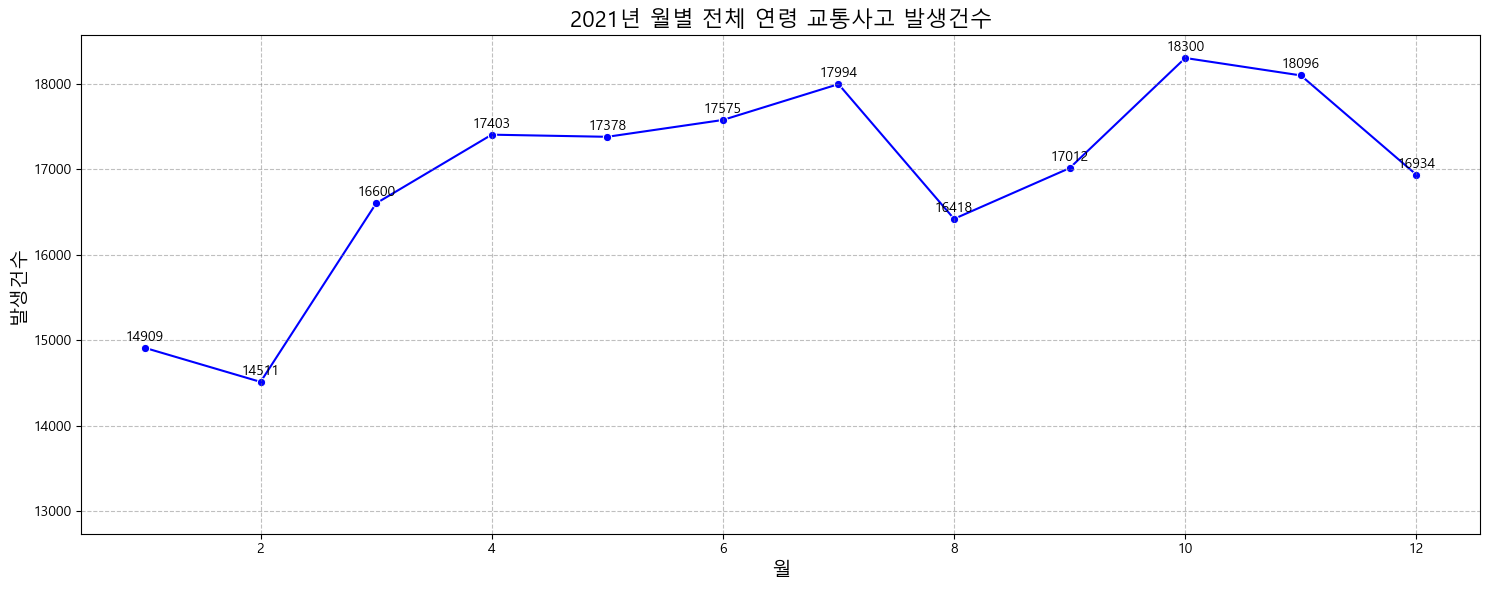

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
data_df = pd.read_csv("2021연령_월별.csv", encoding='utf-8')

# 월별 교통사고 발생건수 계산
monthly_total_accidents = data_df.groupby('월')['발생건수'].sum().reset_index()

# 시각화 (꺾은선 그래프)
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_total_accidents, x='월', y='발생건수', marker='o', color='blue')

# 각 점에 해당하는 값을 표시
for i, txt in enumerate(monthly_total_accidents['발생건수']):
    plt.annotate(txt, (monthly_total_accidents['월'][i], monthly_total_accidents['발생건수'][i]),
                 textcoords="offset points", xytext=(0,5), ha='center')
    
# 짝수 월인 경우 수직 보조선 추가 (반투명도 적용)
for month in monthly_total_accidents['월']:
    if month % 2 == 0:
        plt.axvline(x=month, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

    
# 발생건수 1000마다 수평 보조선 추가 (반투명도 적용)
for line_value in range(13000, monthly_total_accidents['발생건수'].max(), 1000):
    plt.axhline(y=line_value, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

# 그래프 제목과 레이블 추가
plt.title('2021년 월별 전체 연령 교통사고 발생건수', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('발생건수', fontsize=14)

# 그래프 표시
plt.tight_layout()
plt.show()
